## PRML 3.3 Bayesian Linear Regression

###Overview
This chapter deal with Bayesian treatment of lenear regression.
Figure 3.8 shows examples of the predictive distribution drawn by (3.58) for a model consisting of 9 Gaussian basis functions using the data generated form funcsion sin(2πx).

###Procedure

①The predictive distribution tis written in the form (3.57).
\begin{equation*}
 p(t|{\bf x}, {\bf t}, \alpha, \beta) = N (t| {\bf m}^T_N \phi({\bf x}),  \sigma^2_N ({\bf x})) (3.58)
\end{equation*}

②The model uses 9 Gaussian basis function ($\phi_i(x) = \exp\{- \frac{(x -\mu_j)^2}{2s^2}\}$).
There is no particular instruction to deploy, so basis functions are allocated at uniform intervals.


③The mean and variance of predictive distribution are given by
\begin{equation*}{\bf m}_N = \beta{\bf S}_N\Phi(x_n)^{\bf T}{\bf t}(3.53)\end{equation*}

\begin{equation*} \sigma^2_N(x) = \beta^{-1} + \phi({\bf x})^{\bf T} {\bf S}_N \phi({\bf x}). (3.59)\end{equation*}

\begin{equation*}{\bf S}^{-1}_N = \alpha {\bf I} + \beta\Phi^{\bf T}\Phi(3.54)\end{equation*}

In [ ]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def func(x_train, y_train):
    # (3.4) Gausian baasis function
    def phi(s, mu_i, M, x):
        return np.array([exp(-(x - mu)**2 / (2 * s**2)) for mu in mu_i]).reshape((M, 1))

    #(3.53)' ((1.70)) Mean of predictive distribution
    def m(x, x_train, y_train, S):
        sum = np.array(zeros((M, 1)))
        for n in xrange(len(x_train)):
            sum += np.dot(phi(s, mu_i, M, x_train[n]), y_train[n])
        return Beta * phi(s, mu_i, M, x).T.dot(S).dot(sum)
    
    #(3.59)'((1.71)) Variance of predictive distribution   
    def s2(x, S):
        return 1.0/Beta + phi(s, mu_i, M, x).T.dot(S).dot(phi(s, mu_i, M, x))

    #(3.53)' ((1.72))
    def S(x_train, y_train):
        I = np.identity(M)
        Sigma = np.zeros((M, M))
        for n in range(len(x_train)):
            Sigma += np.dot(phi(s, mu_i, M, x_train[n]), phi(s, mu_i, M, x_train[n]).T)
        S_inv = alpha*I + Beta*Sigma
        S = inv(S_inv)
        return S
    
    #params for prior probability
    alpha = 0.1
    Beta = 9
    s = 0.1

    #use 9 gaussian basis functions
    M = 9

    # Assign basis functions
    mu_i = np.linspace(0, 1, M)
    
    S = S(x_train, y_train)

    #Sine curve
    x_real = np.arange(0, 1, 0.01)
    y_real = np.sin(2*np.pi*x_real)
    
    #Seek predictive distribution corespponding to entire x
    mean = [m(x, x_train, y_train, S)[0,0] for x in x_real]
    variance = [s2(x, S)[0,0] for x in x_real]
    SD = np.sqrt(variance)
    upper = mean + SD
    lower = mean - SD
    
    plot(x_train, y_train, 'bo')
    plot(x_real, y_real, 'g-')
    plot(x_real, mean, 'r-')
    fill_between(x_real, upper, lower, color='pink')
    xlim(0.0, 1.0)
    ylim(-2, 2)
    title("Figure 3.8")
    show()

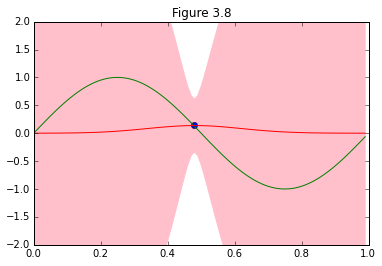

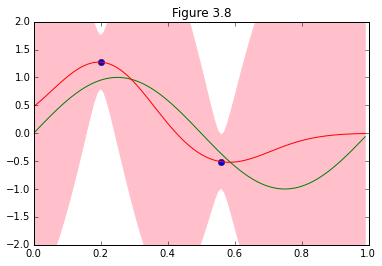

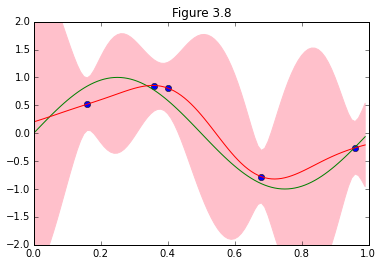

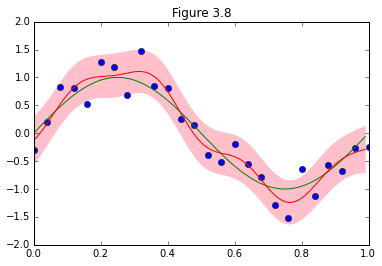

In [3]:
if __name__ == "__main__":
    # Maximum observed data points (underlining function plus some noise)
    x_train = np.linspace(0, 1, 26)

    #Set "small level of random noise having a Gaussian distribution"
    loc = 0
    scale = 0.3
    y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,26)


    #Sample data pick up
    def randidx(n, k):
        r = range(n)
        shuffle(r)
        return sort(r[0:k])

    for k in (1, 2, 5, 26):
        indices = randidx(size(x_train), k)
        func(x_train[indices], y_train[indices])